# Lung Cancer incidence in US
---
This script explores the relationship between counties in US with  lung cancer incidence, polution and economic variables.
In this script we show the relationship between Lung Cancer incidence for 2016 with various socioeconomic parameters 
The sources of data are Lung Cancer, 2016 EPA polution, US Census 2016 and Google Places API.


In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Google developer API key
from config import gkey


# Data Retrieval

In [2]:
# cleaned data from several sources
data_df = pd.read_excel("Resources/Project_County_Data_Final.xlsx")
data_df["Cancer Prevalence per 1000"]=data_df["Lung Cancer Case Count"]/data_df["County Population"]*1000
del data_df["Cancer"]
del data_df["Lung Cancer Case Count"]
del data_df["Unnamed: 0"]


# Establish Correlations between variables

In [3]:

data_dfcorr=data_df
data_corr = data_dfcorr.corr()
corr_df = []
corr_df=data_corr.unstack().sort_values()
corr_df = pd.DataFrame(corr_df).reset_index()
corr_df.columns=["var1", "var2", "r_corr" ]
corr_df=corr_df.loc[corr_df["r_corr"] != 1]
corr_df['abs']= abs(corr_df["r_corr"])
corr_df=corr_df.sort_values(["abs"],ascending=False )
corr_df



,var1,var2,r_corr,abs
379,Hazardous Days,Max AQI,0.974424,0.974424
378,Max AQI,Hazardous Days,0.974424,0.974424
377,Unhealthy for Sensitive Groups Days,Unhealthy Days,0.780313,0.780313
376,Unhealthy Days,Unhealthy for Sensitive Groups Days,0.780313,0.780313
375,Unhealthy Days,Very Unhealthy Days,0.723291,0.723291
374,Very Unhealthy Days,Unhealthy Days,0.723291,0.723291
1,Days PM2.5,Days Ozone,-0.598544,0.598544
0,Days Ozone,Days PM2.5,-0.598544,0.598544
2,Percent Adult Smokers,Household Income,-0.593772,0.593772
3,Household Income,Percent Adult Smokers,-0.593772,0.593772


In [4]:
# create a table with correlation coeficients of interest

corr_df1=corr_df.loc[corr_df["var1"] == "Cancer Prevalence per 1000"]
corr_df1=corr_df1.sort_values(["abs"],ascending=False)
corr_df1

,var1,var2,r_corr,abs
369,Cancer Prevalence per 1000,Percent Adult Smokers,0.459733,0.459733
8,Cancer Prevalence per 1000,Household Income,-0.458186,0.458186
363,Cancer Prevalence per 1000,Longitude,0.365251,0.365251
16,Cancer Prevalence per 1000,County Population,-0.253675,0.253675
23,Cancer Prevalence per 1000,Moderate Days,-0.235097,0.235097
33,Cancer Prevalence per 1000,Unhealthy for Sensitive Groups Days,-0.184048,0.184048
44,Cancer Prevalence per 1000,Days NO2,-0.160894,0.160894
327,Cancer Prevalence per 1000,Days SO2,0.151548,0.151548
58,Cancer Prevalence per 1000,Unhealthy Days,-0.133253,0.133253
73,Cancer Prevalence per 1000,Very Unhealthy Days,-0.093707,0.093707


In [5]:
# Plots

The r-squared is: -0.5046529455594726


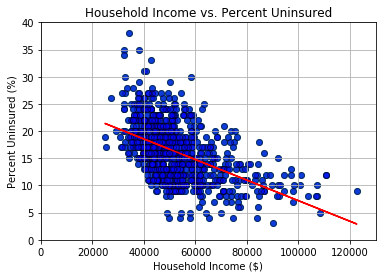

In [6]:
x_values = data_df["Household Income"]
y_values = data_df["Percent Uninsured"]

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (80000,35),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Percent Uninsured")
plt.ylabel("Percent Uninsured (%)")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,130000)
plt.ylim(0,40)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/Income_vs_Unninsure.png')

plt.show()

The r-squared is: -0.45818616442002347


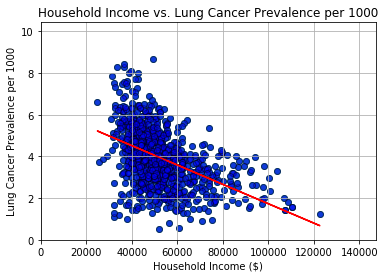

In [7]:
x_values = data_df["Household Income"]
y_values = data_df["Cancer Prevalence per 1000"]
x_max = max(x_values)*1.2
y_max = max(y_values)*1.2

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(80000,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Lung Cancer Prevalence per 1000")
plt.ylabel("Lung Cancer Prevalence per 1000")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,x_max)
plt.ylim(0,y_max)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/Income_vs_CancerPrevalence.png')

plt.show()

The r-squared is: 0.023664909705933684


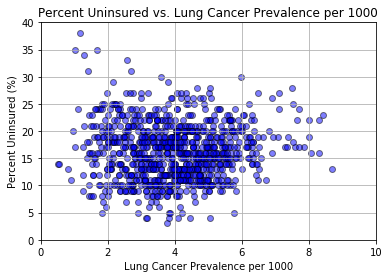

In [13]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Percent Uninsured"]
# print(max(x_values))
# print( max(y_values))

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Percent Uninsured vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Percent Uninsured (%)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,40)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/uninsured_vs_CancerPrevalence.png')

plt.show()


The r-squared is: -0.048171315679996406


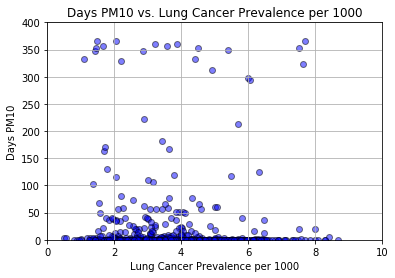

In [12]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM10"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM10 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM10")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/ParticulatesPM10_vs_CancerPrevalence.png')

plt.show()

The r-squared is: -0.05778636861693169


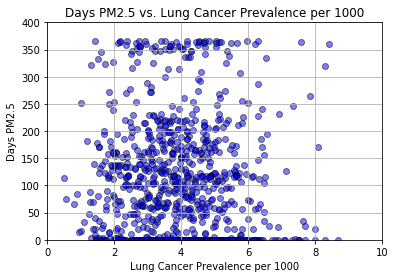

In [14]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM2.5"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM2.5 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM2.5")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/ParticulatesPM25_vs_CancerPrevalence.png')

plt.show()

The r-squared is: -0.039858231407314794


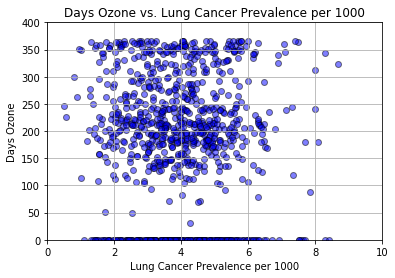

In [10]:

x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days Ozone"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days Ozone vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days Ozone")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/Ozone_vs_CancerPrevalence.png')

plt.show()

## Heatmap 

In [16]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
data_df.head(1)

,State,County,County Population,Household Income,Percent Adult Smokers,Percent Uninsured,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,Max AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude,Cancer Prevalence per 1000
0,Alabama,Baldwin,200111,49626,19,17,247,32,0,0,...,87,0,0,221,0,58,0,30.659218,-87.746067,4.967243


In [17]:
# Store 'Lat' and 'Lng' into  locations 
locations = data_df[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
income_rate = data_df["Household Income"].astype(float)
smokers_rate = data_df["Percent Adult Smokers"].astype(float)
cancer_rate = data_df["Cancer Prevalence per 1000"].astype(float)





In [19]:
# Create a  Heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=income_rate, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius = 0.6)
fig.add_layer(heat_layer)
plt.savefig(f'output_plots/IncomeUSheatmap.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [225]:
# Create a  Heatmap layer
fig = gmaps.figure()
heat_layer2 = gmaps.heatmap_layer(locations, weights=cancer_rate, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = 0.6, gradient=["white","blue"])
fig.add_layer(heat_layer2)

fig


Figure(layout=FigureLayout(height='420px'))

In [227]:
# Create a combined map
fig = gmaps.figure()

fig.add_layer(heat_layer2)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))